In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score


# Data Preprocessing:

In [2]:
df = pd.read_csv('EastWestAirlines.csv')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
if 'ID#' in df.columns:
    df.drop(columns=['ID#'], inplace=True)

In [4]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
df.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [6]:
#Remove outliers using Z-score
z_scores = np.abs((df - df.mean()) / df.std())
df_no_outliers = df[(z_scores < 3).all(axis=1)]
print("\nShape after outlier removal:", df_no_outliers.shape)


Shape after outlier removal: (3631, 11)


In [7]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_no_outliers)
df_scaled = pd.DataFrame(scaled_data, columns=df_no_outliers.columns)


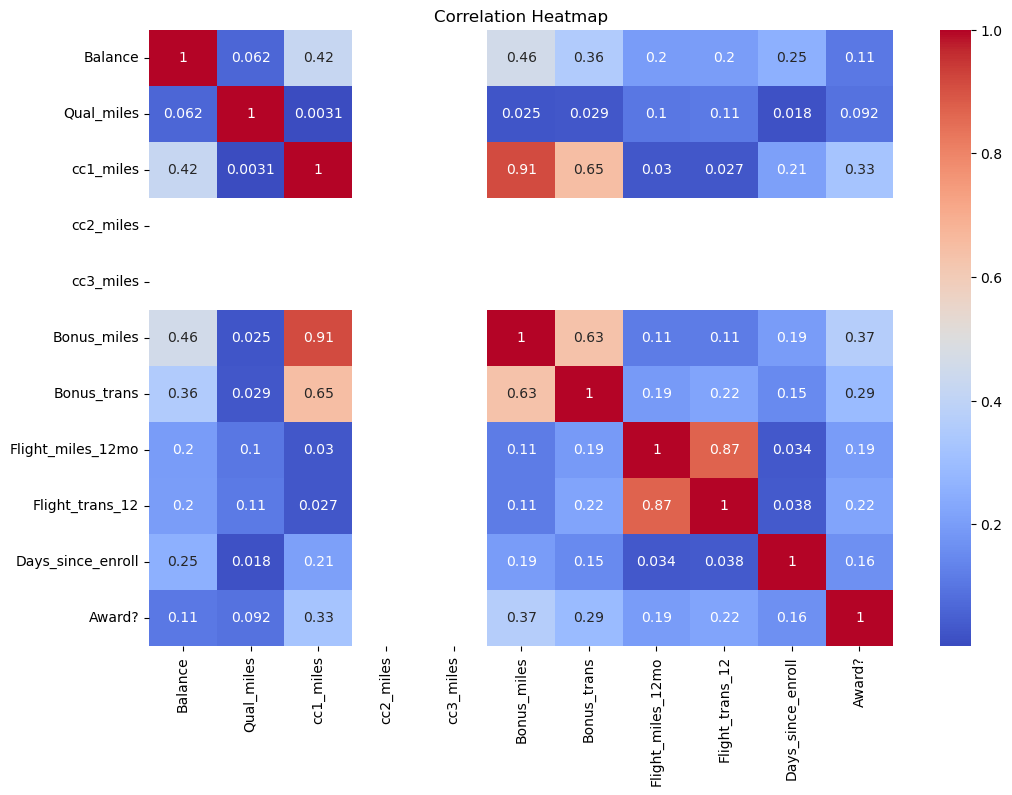

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


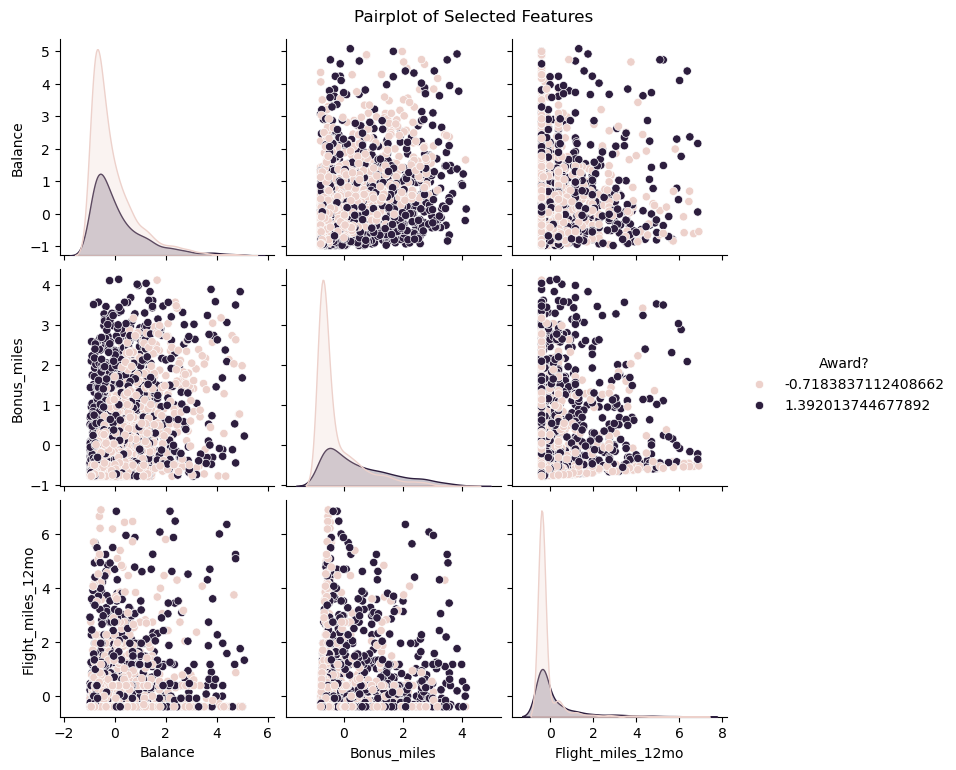

In [9]:
subset_cols = ['Balance', 'Bonus_miles', 'Flight_miles_12mo', 'Award?']
sns.pairplot(df_scaled[subset_cols], hue='Award?')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

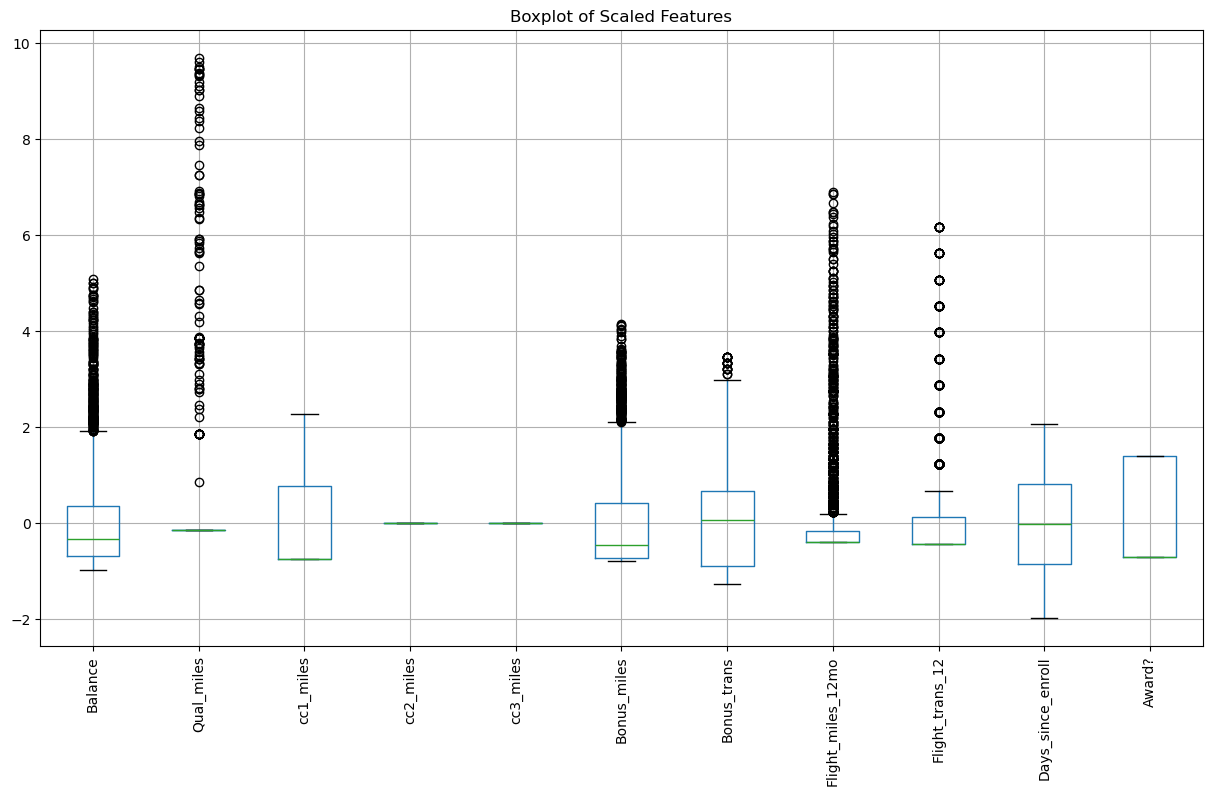

In [10]:
# boxplot
plt.figure(figsize=(15, 8))
df_scaled.boxplot(rot=90)
plt.title("Boxplot of Scaled Features")
plt.grid(True)
plt.show()

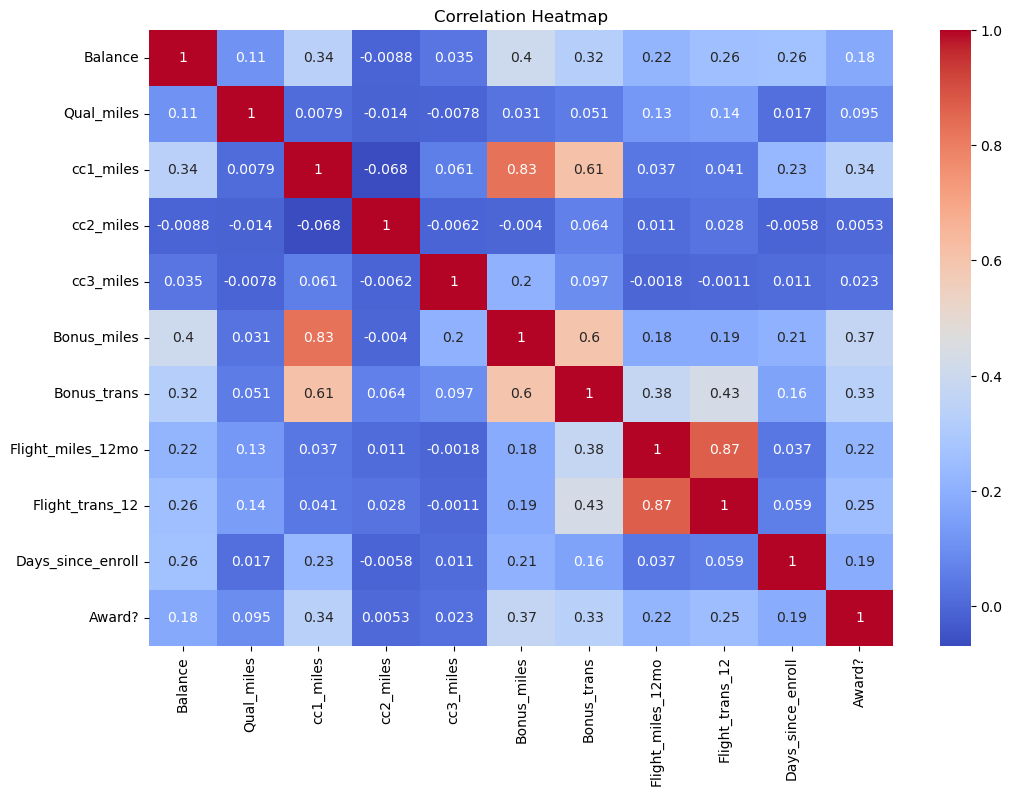

In [11]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [12]:
scaler = StandardScaler()
x = scaler.fit_transform(df_no_outliers)

#  K-Means Clustering

In [13]:
km = KMeans(n_clusters=5, random_state=42)
yp = km.fit_predict(x)  


In [14]:
km.cluster_centers_

array([[ 2.05531477e-01,  2.72382419e-02,  1.27804574e+00,
         0.00000000e+00,  0.00000000e+00,  1.18917460e+00,
         8.95912496e-01, -1.04524428e-01, -9.17834649e-02,
         3.26425001e-01,  1.39201374e+00],
       [-4.99552375e-01, -7.74508475e-02, -6.75893811e-01,
         0.00000000e+00,  0.00000000e+00, -6.17096062e-01,
        -5.89410578e-01, -2.69915461e-01, -2.64234495e-01,
        -9.37818303e-01, -4.63926008e-01],
       [ 6.29681741e-01,  4.73243679e-01,  2.08718323e-03,
         0.00000000e+00,  0.00000000e+00,  2.73891406e-01,
         6.94566942e-01,  3.19721563e+00,  3.12285763e+00,
         9.43294041e-02,  5.98280188e-01],
       [ 8.98143295e-01, -1.09664282e-01,  1.00011788e+00,
         0.00000000e+00,  0.00000000e+00,  7.53023309e-01,
         7.76921566e-01, -2.36065991e-01, -2.51487853e-01,
         2.08435546e-01, -6.73334176e-01],
       [-2.39077568e-01,  3.53833688e-02, -6.61233965e-01,
         0.00000000e+00,  0.00000000e+00, -5.81288840e-01,
  

In [17]:
# Elbow Method 
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

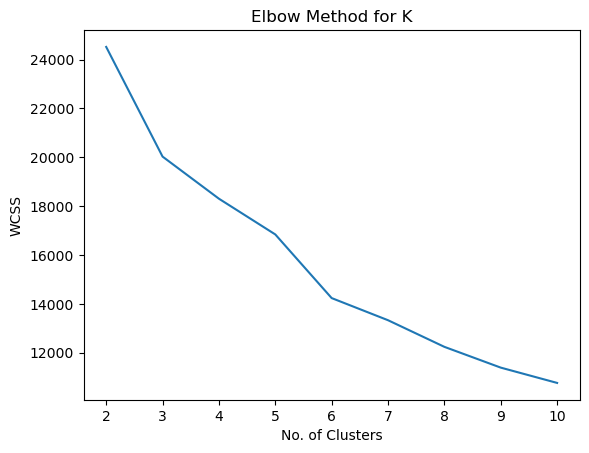

In [18]:
plt.plot(range(2, 11), wcss, )
plt.title('Elbow Method for K')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
# Fit KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(x)
df_no_outliers['KMeans_Cluster'] = kmeans_labels

C:\Users\Admin\AppData\Local\Temp\ipykernel_14184\1208336620.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['KMeans_Cluster'] = kmeans_labels


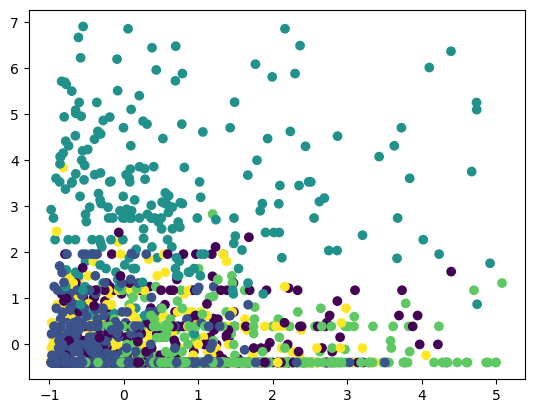

In [20]:
plt.scatter(x[:, df_no_outliers.columns.get_loc('Balance')],
            x[:, df_no_outliers.columns.get_loc('Flight_miles_12mo')],
            c=yp, cmap='viridis')

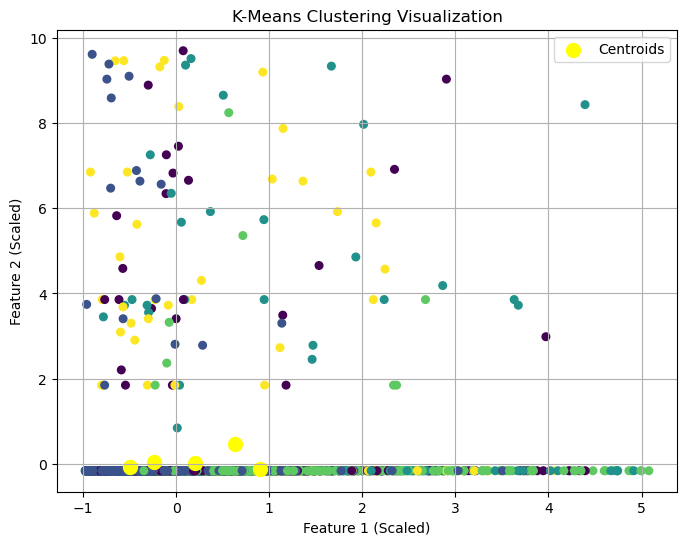

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=yp, cmap='viridis', s=30)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='yellow', s=100, label='Centroids')
plt.title("K-Means Clustering Visualization")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.legend()
plt.grid(True)
plt.show()

In [22]:
km.inertia_

16843.6739316173

# Hierarchical Clustering

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [25]:
df.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

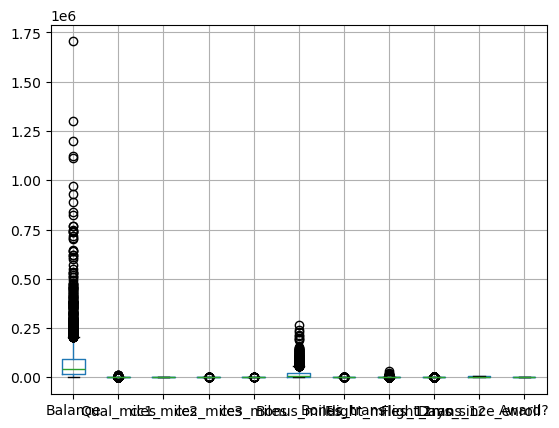

In [26]:
df.boxplot()
plt.show()

In [27]:
df1=pd.DataFrame(x,columns=df.columns)

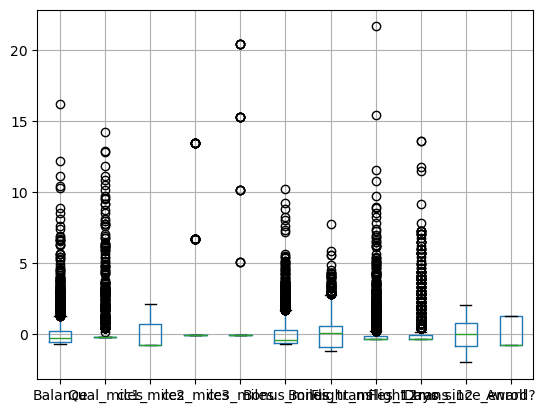

In [28]:
df1.boxplot()
plt.show()

In [29]:
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [30]:
from scipy.cluster import hierarchy

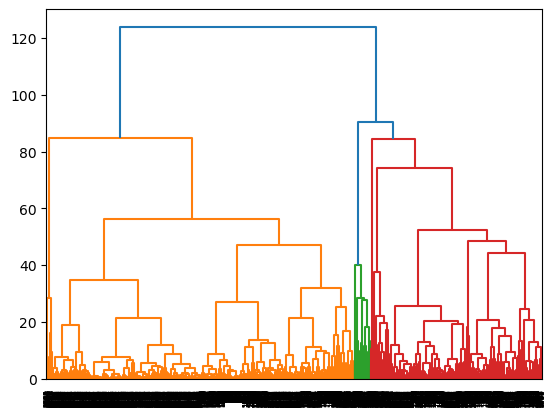

In [31]:
lk = hierarchy.linkage(x, method='ward')
dendrogram = hierarchy.dendrogram(lk)
plt.show()

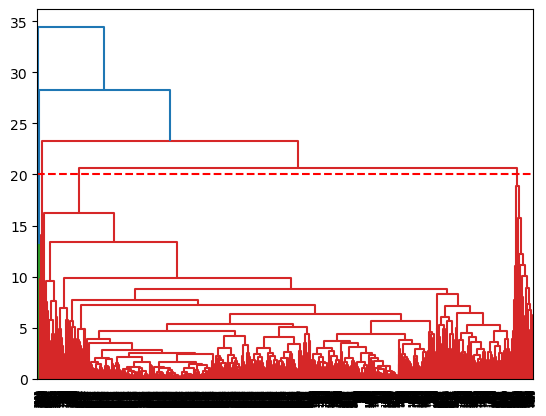

In [40]:
lk = hierarchy.linkage(x, method='complete')
dendrogram = hierarchy.dendrogram(lk)
plt.axhline(y = 20, linestyle = '--', color = 'red')
plt.show()

#  DBSCAN Clustering

In [48]:
from sklearn.cluster import DBSCAN

In [45]:
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan_labels = dbscan.fit_predict(x)


In [46]:
df['DBSCAN_Cluster'] = dbscan_labels

In [51]:
from sklearn.decomposition import PCA

In [52]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(x)

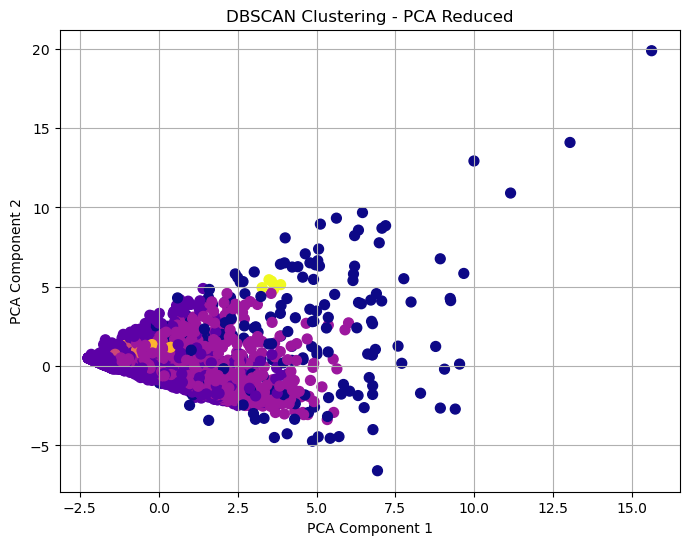

In [53]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dbscan_labels, cmap='plasma', s=50)
plt.title("DBSCAN Clustering - PCA Reduced")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

# Cluster Analysis and Interpretation

# Visualization:

In [78]:
from sklearn.cluster import KMeans

# Apply K-Means clustering with k=7
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans_labels = kmeans.fit_predict(x)

# Store K-Means cluster labels in the DataFrame
df['KMeans_Cluster'] = kmeans_labels


In [81]:
from sklearn.cluster import AgglomerativeClustering

# Apply Hierarchical Clustering (7 clusters)
hc = AgglomerativeClustering(n_clusters=7, metric='euclidean', linkage='ward')

# Fit and predict
hc_labels = hc.fit_predict(x)

# Save to DataFrame
df['Hierarchical_Cluster'] = hc_labels


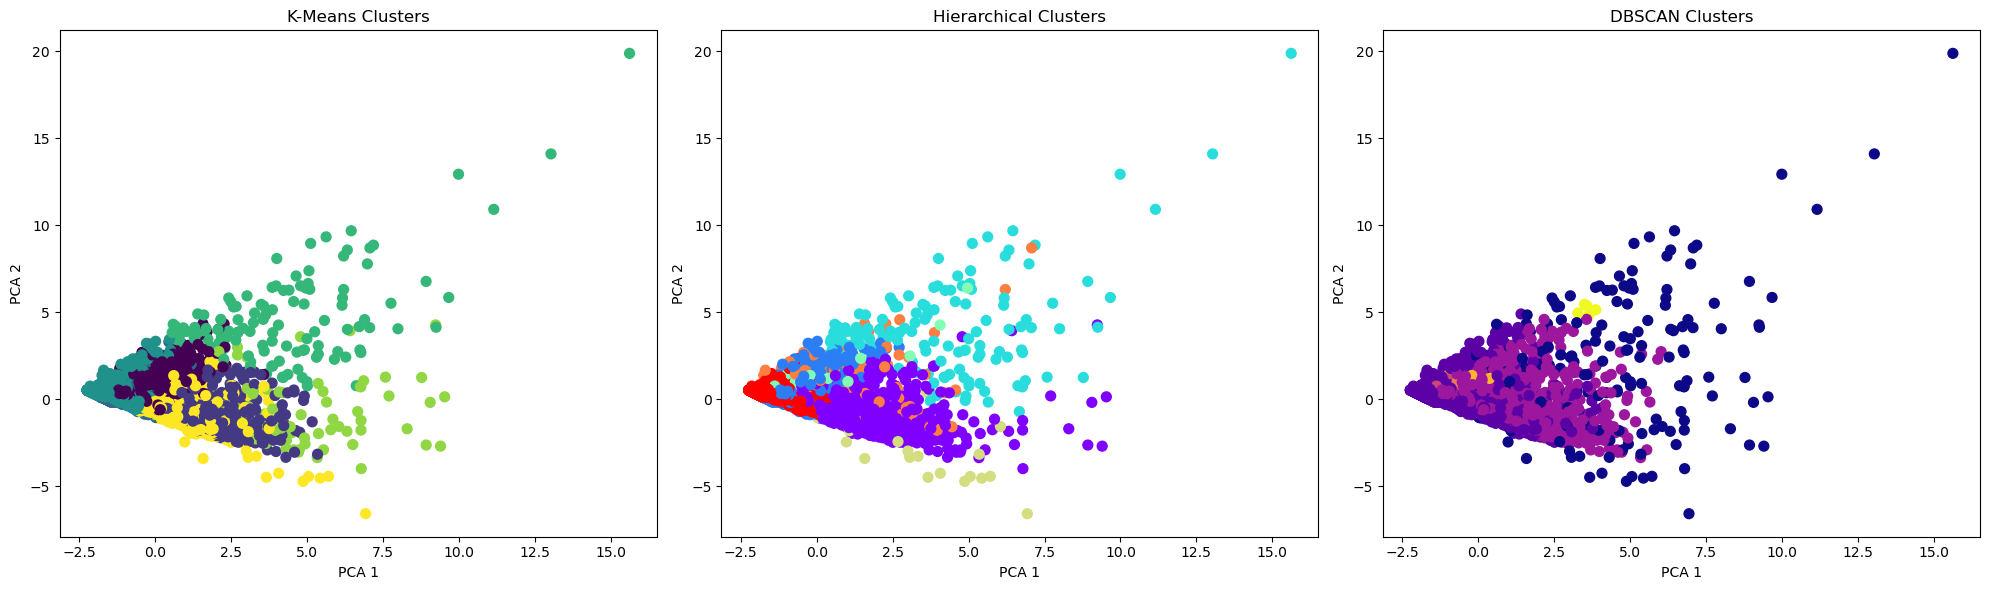

In [82]:
import matplotlib.pyplot as plt

# Setup for side-by-side plots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# K-Means Visualization
axes[0].scatter(pca_data[:, 0], pca_data[:, 1], c=df['KMeans_Cluster'], cmap='viridis', s=50)
axes[0].set_title("K-Means Clusters")
axes[0].set_xlabel("PCA 1")
axes[0].set_ylabel("PCA 2")

# Hierarchical Clustering Visualization
axes[1].scatter(pca_data[:, 0], pca_data[:, 1], c=df['Hierarchical_Cluster'], cmap='rainbow', s=50)
axes[1].set_title("Hierarchical Clusters")
axes[1].set_xlabel("PCA 1")
axes[1].set_ylabel("PCA 2")

# DBSCAN Visualization
axes[2].scatter(pca_data[:, 0], pca_data[:, 1], c=df['DBSCAN_Cluster'], cmap='plasma', s=50)
axes[2].set_title("DBSCAN Clusters")
axes[2].set_xlabel("PCA 1")
axes[2].set_ylabel("PCA 2")

plt.tight_layout()
plt.show()


# Evaluation and Performance Metrics:

In [86]:
from sklearn.metrics import silhouette_score

# Silhouette score for K-Means
kmeans_score = silhouette_score(x, df['KMeans_Cluster'])

# Silhouette score for Hierarchical
hierarchical_score = silhouette_score(x, df['Hierarchical_Cluster'])

# DBSCAN score (ignoring noise points labeled as -1)
dbscan_labels = df['DBSCAN_Cluster']
dbscan_filtered = x[dbscan_labels != -1]
dbscan_labels_filtered = dbscan_labels[dbscan_labels != -1]

if len(set(dbscan_labels_filtered)) > 1:
    dbscan_score = silhouette_score(dbscan_filtered, dbscan_labels_filtered)
else:
    dbscan_score = "Not Applicable (only 1 cluster or all noise)"

# Print Results
print("Silhouette Scores:")
print(f"K-Means (k=7):        {kmeans_score:.4f}")
print(f"Hierarchical (k=7):  {hierarchical_score:.4f}")
print(f"DBSCAN:              {dbscan_score}")


Silhouette Scores:
K-Means (k=7):        0.2219
Hierarchical (k=7):  0.1897
DBSCAN:              0.28053595722860075
